<a href="https://colab.research.google.com/github/eloigil/ai-course/blob/master/05-introduction-to-machine-learning/image_recognition_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Pre-trained model
---

In [3]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


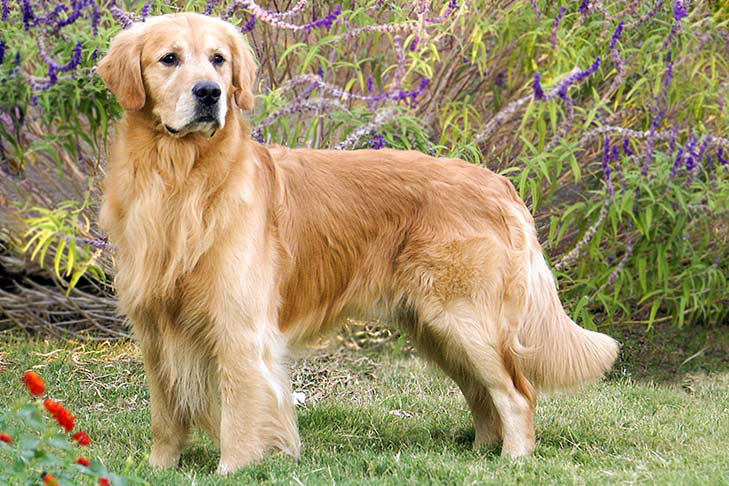

In [4]:
url = 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12130118/Golden-Retriever-Standing1.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [0]:
preprocess = transforms.Compose([
  transforms.Resize(128),
  transforms.CenterCrop(128),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225]
  )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


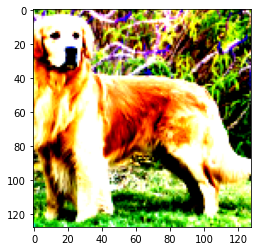

In [15]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

In [16]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [17]:
out = inception(batch)
out

tensor([[ 7.0589e+00,  8.7267e+00,  2.9900e-01,  2.4481e-01, -3.7255e+00,
         -1.0469e+00,  5.0048e+00,  3.7503e+00,  6.3489e+00, -3.1185e+00,
         -2.1716e+00,  7.4890e-01,  2.2191e+00,  2.1077e+00, -3.8949e+00,
         -2.7151e+00,  6.1993e-01,  1.6785e+00, -3.1210e+00, -1.0838e+00,
         -6.5115e+00, -3.9163e+00, -8.8885e-01,  3.1237e+00, -6.5669e+00,
         -1.5479e+00, -5.3936e+00, -4.0921e+00,  1.4406e+00, -1.0236e+00,
          4.4652e-01,  1.5212e+00, -3.1761e-01, -2.8055e+00,  2.0982e-01,
         -2.0071e+00,  1.4754e+00,  4.3145e+00,  2.5769e+00, -1.8380e+00,
         -2.2008e+00, -4.0636e+00, -5.3107e-01,  2.6973e+00, -4.7731e+00,
         -4.1551e+00, -5.3245e+00, -6.5205e+00,  9.0681e+00,  1.7532e+00,
         -2.9986e+00,  3.0758e+00, -8.8215e+00, -6.0542e+00, -1.0925e+01,
          2.5113e+00, -4.5745e+00, -2.7122e+00, -5.2418e+00, -2.8206e+00,
         -5.0303e+00,  3.9577e-01,  2.2741e+00, -3.3225e+00,  2.1211e-01,
         -5.7235e+00, -6.6317e+00,  2.

In [0]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]


In [18]:
out

tensor([[ 7.0589e+00,  8.7267e+00,  2.9900e-01,  2.4481e-01, -3.7255e+00,
         -1.0469e+00,  5.0048e+00,  3.7503e+00,  6.3489e+00, -3.1185e+00,
         -2.1716e+00,  7.4890e-01,  2.2191e+00,  2.1077e+00, -3.8949e+00,
         -2.7151e+00,  6.1993e-01,  1.6785e+00, -3.1210e+00, -1.0838e+00,
         -6.5115e+00, -3.9163e+00, -8.8885e-01,  3.1237e+00, -6.5669e+00,
         -1.5479e+00, -5.3936e+00, -4.0921e+00,  1.4406e+00, -1.0236e+00,
          4.4652e-01,  1.5212e+00, -3.1761e-01, -2.8055e+00,  2.0982e-01,
         -2.0071e+00,  1.4754e+00,  4.3145e+00,  2.5769e+00, -1.8380e+00,
         -2.2008e+00, -4.0636e+00, -5.3107e-01,  2.6973e+00, -4.7731e+00,
         -4.1551e+00, -5.3245e+00, -6.5205e+00,  9.0681e+00,  1.7532e+00,
         -2.9986e+00,  3.0758e+00, -8.8215e+00, -6.0542e+00, -1.0925e+01,
          2.5113e+00, -4.5745e+00, -2.7122e+00, -5.2418e+00, -2.8206e+00,
         -5.0303e+00,  3.9577e-01,  2.2741e+00, -3.3225e+00,  2.1211e-01,
         -5.7235e+00, -6.6317e+00,  2.

In [0]:
_, index = torch.max(out, 1)

In [20]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.85728454589844)

In [21]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

golden retriever 96.85728454589844
Irish setter, red setter 2.6658689975738525
Saluki, gazelle hound 0.4674622416496277
Brittany spaniel 0.009116774424910545
cocker spaniel, English cocker spaniel, cocker 0.00017641938757151365
